In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm
import scipy.stats as stats
from matplotlib import cm
import seaborn as sns
import arviz as az
import pymc3 as pm

WARN: Could not locate executable g77
WARN: Could not locate executable f77
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
WARN: Could not locate executable f90
WARN: Could not locate executable DF
WARN: Could not locate executable efl
WARN: Could not locate executable gfortran
WARN: Could not locate executable f95
WARN: Could not locate executable g95
WARN: Could not locate executable efort
WARN: Could not locate executable efc
WARN: Could not locate executable flang
WARN: don't know how to compile Fortran code on platform 'nt'


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


# Assignment 1: Toxicity bioassay

## Problem and data

A **bioassay** is biochemical test to estimate the potency of a sample compound. A typical bioassay involves a stimulus (ex. drugs) applied to a subject (ex. animals, tissues, plants). The corresponding response (ex. death) of the subject is thereby triggered and measured (Wikipedia).

The following bioassay taken from Racine et al. (1986) is meant to evaluate the toxicity of a drug on animals. The effect of the drug is evaluated at $N=4$ dose levels. Each dose level $x_i$ is administered to a batch of $n_i$ animals. The number of deaths $y_i$ is the observed response.

| |Dose $x_i$ (log g/ml) | Number of animals $n_i$ | Number of deaths $y_i$ |
| ---|--- | --- | --- |
| 1|-0.86 | 5 | 0 |
| 2|-0.30 | 5 | 1 |
| 3|-0.05 | 5 | 3 |
| 4|0.73  | 5 | 5 |


For instance, the dose level $x_3=-0.05$ has been administered at $n_3=5$ animals. Out of the 5 animals, $y_3=3$ died. <br/>
Note that the dose $x_i$ is measured on a logarithmic scale. Thus, negative concentration levels are present.

We define for convenience (both as math symbols and as Python objects) the vectors $x$, $n$, and $y$ containing the quantities of the corresponding columns.

In [2]:
x = np.array([-0.86, -0.30, -0.05, 0.73]) # dose levels
n = np.array([5., 5., 5., 5.]) # number of subjects per dose level
y = np.array([0, 1, 3, 5]) # number of deaths per dose level

## Modeling assumptions

For the probabilistic model, we make the following assumptions:

1. The outcome of the $n_i$ animals within each group $i$ are *independent*. Each animal in the group has probability $p_i$ of death.

2. The probability of death $p_i$ depends on the dose $x_i$ as follows:
    $$p_i = \rm{sigm}(\alpha + \beta x_i),$$ 
    where 
    \begin{align*}
    \rm{sigm}(z) = \frac{1}{1 + e^{-z}}.
    \end{align*}
3. The prior probability of the parameters 
$\theta = \begin{bmatrix}
\alpha \\
\beta
\end{bmatrix}$
is Gaussian: 
\begin{align}
\alpha &\sim \mathcal{N}(\mu_\alpha, \sigma^2_\alpha), \qquad \mu_\alpha = 0, \sigma_\alpha=2\\
\beta &\sim \mathcal{N}(\mu_\beta, \sigma^2_\beta), \qquad \mu_\beta=10, \sigma_\beta=10.
\end{align}
4. The outcomes in the four groups are independent of each other, given $\theta$.


In [3]:
# Define alpha and beta prior means and variances
alpha_prior_mean, alpha_prior_variance, beta_prior_mean, beta_prior_variance = 0, 2**2, 10, 10**2

## 1.1: Probabilistic model

* Derive and comment the full probabilistic model.

The probabilistic model is:

\begin{align}
\alpha \sim \mathcal{N}(\mu_\alpha, \sigma^2_\alpha)\\
\beta \sim \mathcal{N}(\mu_\beta, \sigma^2_\beta)\\
y_i | \alpha, \beta, x_i \sim \mathrm{Bin}(n_i, \rm{sigm}(\alpha + \beta x_i)).
\end{align}

Here, $y_i$ is the number of animals that die in group $i$, and $\alpha$ and $\beta$ are the parameters of the sigmoid function that determines the probability of death for each group. The probability of death for each group is modeled as a binomial distribution, and the probability of success (death) is given by the sigmoid function of the dose $x_i$ with parameters $\alpha$ and $\beta$. 


The parameters $\alpha$ and $\beta$ are drawn from normal distributions with given means and variances.

This probabilistic model makes the following assumptions:
The outcome of the $n_i$ animals within each group $i$ are independent. Each animal in the group has probability $p_i$ of death, where $p_i = \rm{sigm}(\alpha + \beta x_i)$.
The outcomes in the four groups are independent of each other, given $\theta$.

This probabilistic model can be used to estimate the parameters $\alpha$ and $\beta$ from the data and make predictions about the probability of death for animals in future groups with different doses $x_i$.

C:\Users\manue\AppData\Local\Programs\Python\Python310\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\manue\AppData\Local\Programs\Python\Python310\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\manue\AppData\Local\Programs\Python\Python310\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, alpha]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 27 seconds.
WARNING (aesara.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (aesara.configdefaults): g++ not detected!  Aesara will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set Aesara flags cxx to an empty string.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


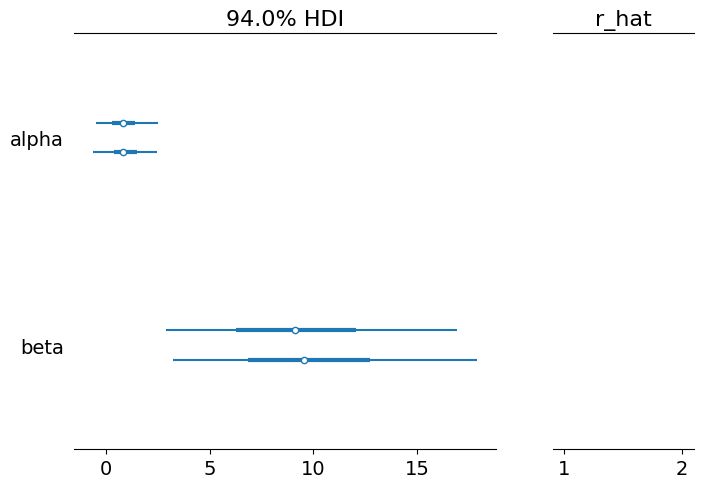

In [4]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

with pm.Model() as bio_model:
    # Prior distribution
    alpha = pm.Normal('alpha', 0, sigma=2)
    beta = pm.Normal('beta', 10, sigma=10)
    
    theta = sigmoid(alpha + beta * x)
    
    # Linear combination of the parameters
    deaths = pm.Binomial('deaths', n=n, p=theta, observed=y)
    
    # Draw samples
    trace = pm.sample(1000, tune=2000, cores=2);
    
    # Plot the two parameters
    az.plot_forest(trace, var_names=['alpha', 'beta'], r_hat=True);

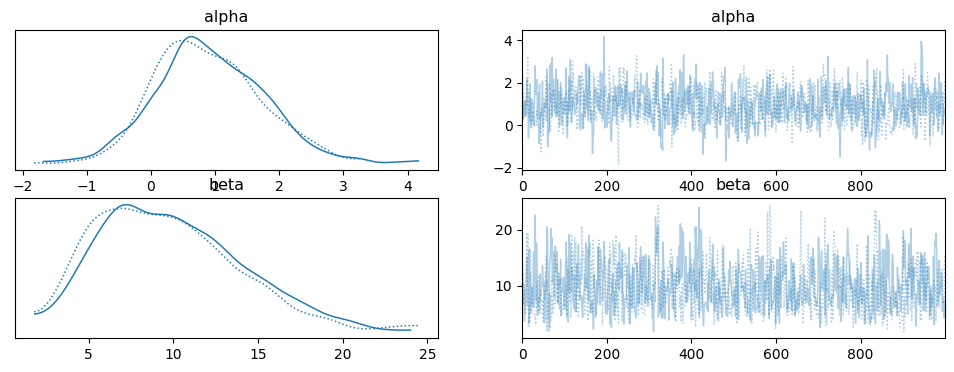

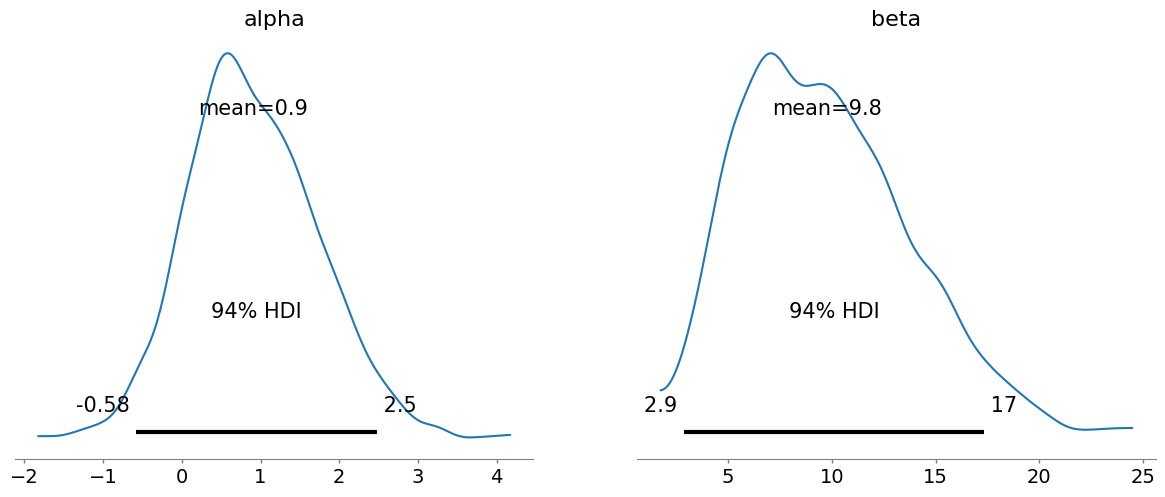

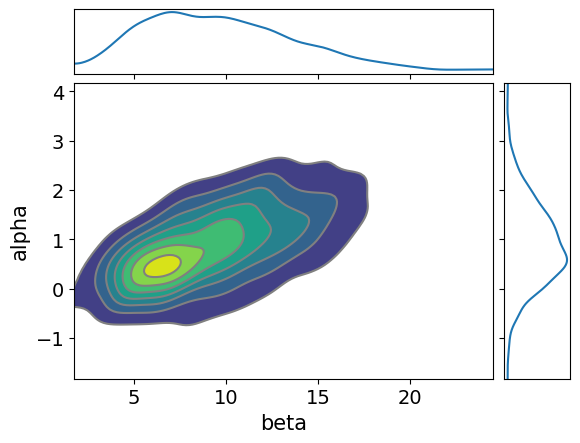

In [8]:
# Plot model parameters
pm.model_to_graphviz(bio_model)

with bio_model:
    az.plot_trace(trace);

with bio_model:
    az.plot_posterior(trace);

    
# Plot the prior distribution
with bio_model:
    az.plot_pair(trace,
                 kind="kde",
                 var_names=['beta','alpha'], 
                 marginals=True);

## 1.2: Maximum Likelihood estimation 

* Derive an analytical expression of the likelihood function $\mathcal{L}(\theta) = P(y|\theta)$.

$$\text{likelihood}: \mathcal{L}(\theta) = \prod_{i=1}^4 \binom{n_i}{y_i} (\rm{sigm}(\alpha + \beta x_i))^{y_i} (1 - \rm{sigm}(\alpha + \beta x_i))^{n_i - y_i}$$

* Write a Python function corresponding to the likelihood function $\mathcal{L}(\theta)$. Ignore multiplicative factors which do not depend on $\theta$.

In [6]:
# Define the sigmoid function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [7]:
# Define the likelihood function
def lik(alpha, beta):
    theta = sigmoid(alpha + beta * x)
    liks = [(theta[i] ** y[i]) * (1 - theta[i])**(n[i]-y[i]) for i in range(4)]
    return liks[0] * liks[1] * liks[2] * liks[3]

* Visualize the likelihood function in 2D and comment the obtained figure. 

   Hints:
    * you may use the `pcolormesh` function of `matplotlib`
    * appropriate ranges for $\alpha$ and $\beta$ are $[-4, 8]$ and $[-10, 40]$, respectively
    * an appropriate step size for both $\alpha$ and $\beta$ is 0.01

In [8]:
# Define alpha and beta vectors
alpha_vec = np.arange(-4, 8, 0.01)
beta_vec = np.arange(-10, 40, 0.01)

In [9]:
# Check vectors dimensions
print(len(alpha_vec))
print(len(beta_vec))

1200
5000


In [10]:
# Compute a matrix of likelihood values given alpha and beta vectors
matrix = np.zeros((len(alpha_vec), len(beta_vec)))

for i, alpha in enumerate(alpha_vec):
    for j, beta in enumerate(beta_vec):
        matrix[i, j] = lik(alpha, beta)

lik_vec = [lik(alpha, beta) for alpha, beta in zip(alpha_vec, beta_vec)]

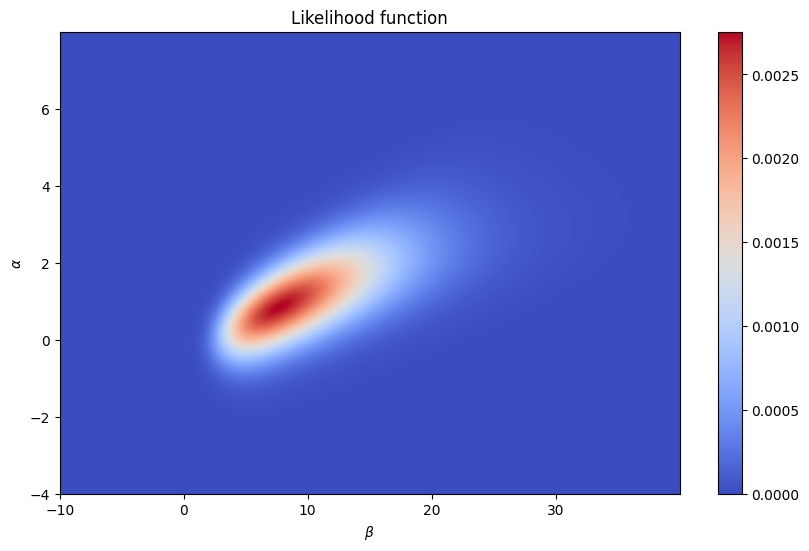

In [11]:
# Visualize the Likelihood function
fig, ax = plt.subplots(figsize=(10, 6))
c = ax.pcolormesh(beta_vec, alpha_vec, matrix, cmap=cm.coolwarm, shading='auto')
fig.colorbar(c, ax=ax)
ax.set_title(f"Likelihood function")
ax.set_xlabel(r"$\beta$")
ax.set_ylabel(r"$\alpha$");

The maximum values of alpha and beta are in the range 0-2 for alpha and 4-15 for beta.
The mean is at about 1 for alpha and at about 10 for beta.
Alpha and beta seem to be correlated, and the plot is kind of simmetric with respect of a line from the bottom left corner and the top right corner.
Negative values of alpha have 0 as likelihood value for both alpha and beta.
Starting from the maximum points (about 1 for alpha and 9 for beta), as alpha and beta increase together, the likelihood values gets smaller and smaller, and when they reach about 6 for alpha and 38 for beta, the likelihood values start to be 0.

* Derive an analytical expression of the log-likelihood function $\ell(\theta)$. 

$$\text{log-likelihood}: \ell(\theta) = \log \mathcal{L}(\theta) = \log P(y|\theta) = \sum_{i=1}^4 \log  \binom{n_i}{y_i} + ( y_i \log(\rm{sigm}(\alpha + \beta x_i)) + (n_i - y_i) \log(1 - \rm{sigm}(\alpha + \beta x_i)) )$$

* Write a Python function corresponding to the log-likelihood function $\ell(\theta)$, possibly up to an additive factor not depending on $\theta$. 

In [12]:
# Define the log-likelihood function
def log_lik(alpha, beta):
    theta = sigmoid(alpha + beta * x)
    theta = np.where(theta==0, 1e-12, theta) # avoids a numerical issue for theta=0
    liks = [(np.log(theta[i]) * y[i]) + (np.log(1 - theta[i])*(n[i]-y[i])) for i in range(4)]
    return liks[0] + liks[1] + liks[2] + liks[3]

In [13]:
# Check the function works correctly
log_lik(1,1)

-12.994740384490186

* Visualize the log-likelihood function in 2D and comment the obtained figure. 

In [14]:
# Compute a matrix of log-likelihood values given alpha and beta vectors
log_matrix = np.zeros((len(alpha_vec), len(beta_vec)))

for i, alpha in enumerate(alpha_vec):
    for j, beta in enumerate(beta_vec):
        log_matrix[i, j] = log_lik(alpha, beta)

log_lik_vec = [log_lik(alpha, beta) for alpha, beta in zip(alpha_vec, beta_vec)]

C:\Users\manue\AppData\Local\Temp\ipykernel_7924\1067702800.py:5: RuntimeWarning: divide by zero encountered in log
  liks = [(np.log(theta[i]) * y[i]) + (np.log(1 - theta[i])*(n[i]-y[i])) for i in range(4)]
C:\Users\manue\AppData\Local\Temp\ipykernel_7924\1067702800.py:5: RuntimeWarning: invalid value encountered in double_scalars
  liks = [(np.log(theta[i]) * y[i]) + (np.log(1 - theta[i])*(n[i]-y[i])) for i in range(4)]


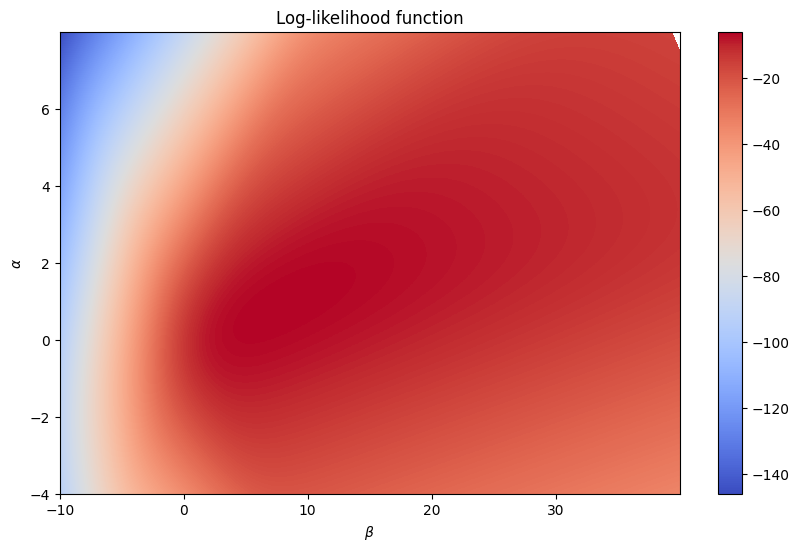

In [15]:
# Visualize the log-Likelihood function
fig, ax = plt.subplots(figsize=(10, 6))
c = ax.pcolormesh(beta_vec, alpha_vec, log_matrix, cmap=cm.coolwarm, shading='auto')
fig.colorbar(c, ax=ax)
ax.set_title(f"Log-likelihood function")
ax.set_xlabel(r"$\beta$")
ax.set_ylabel(r"$\alpha$");

Also in the log-likelihood plot we see that the maximumvalues of alpha and beta are respectively about 1-2 and 9-10.
It is more difficult to see how the log-likelihood value vary by increasing alpha and beta from their maximum but still wer can see the log-likelihood value decreases when they increase together after their maximum.


* Compute the maximum likelihood estimate $\alpha^{\rm ml}, \beta^{\rm ml}$ of the parameters $\alpha, \beta$ through numerical optimizations. 

    Hints:
     * You may use the Python function `scipy.optimize.minimize`. 
     * You may look at the figures above to define a good starting point for optimization 
     * You may either minimize the likelihood or the log-likelihood. What is your choice?

In [16]:
def minus_lik(args):
    alpha, beta = args
    theta = sigmoid(alpha + beta * x)
    liks = [(theta[i] ** y[i]) * (1 - theta[i])**(n[i]-y[i]) for i in range(4)]
    return -1 * liks[0] * liks[1] * liks[2] * liks[3]

In [17]:
initial_guess = (1, 8)
result = minimize(minus_lik, initial_guess)
if result.success:
    alpha_ml, beta_ml = result.x
    print('alpha ml:', alpha_ml, '\nbeta ml:', beta_ml)
else:
    raise ValueError(result.message)

alpha ml: 0.8464603097948941 
beta ml: 7.748156540322202


* Visualize the likelihood function in 2D together with the ML estimate. Comment the obtained figure. 

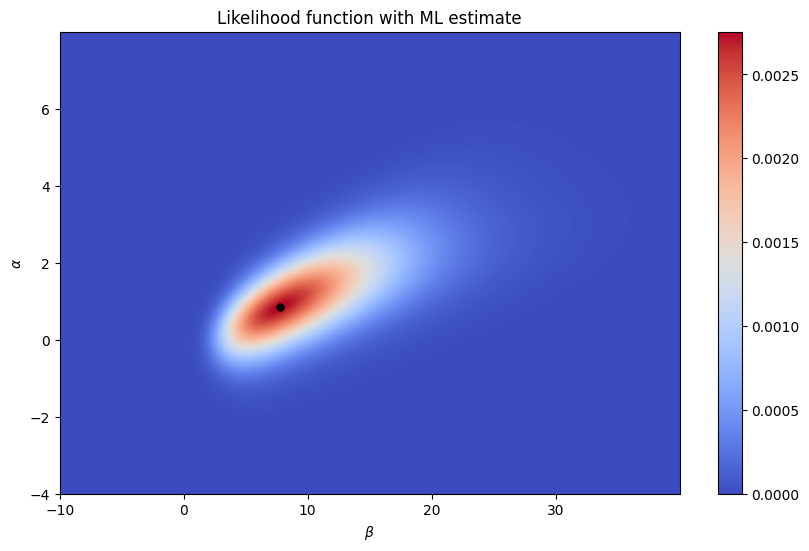

In [18]:
# Visualize the maximum point of the likelihood function as a black dot on the likelihood function
fig, ax = plt.subplots(figsize=(10, 6))
c = ax.pcolormesh(beta_vec, alpha_vec, matrix, cmap=cm.coolwarm, shading='auto')

fig.colorbar(c, ax=ax)
ax.set_title(f"Likelihood function with ML estimate")
ax.set_xlabel(r"$\beta$");
ax.set_ylabel(r"$\alpha$");
ax.plot(beta_ml, alpha_ml, color='black', markersize=5, marker='o')

The maximum value of the likelihood is reached when alpha is at about 1 (0.84) and beta is about 8 (7.74).
The likelihood function was commented above.

## 1.2: Maximum A Posteriori estimation

* Derive an analytical expression of the posterior $f(\theta | y)$, up to a multiplicative factor not depending on $\theta$. 

Hint: exploit the already-obtained likelihood and the known functional form of the Gaussian pdf.

By definition, the posterior distribution $p_{\rm post}(\theta)$ is:
$$f_{\rm post}(\theta) = f(\theta | y) = \frac{\overbrace{P(y|\theta)}^{=\mathcal{L}(\theta)} \cdot f_{\rm prior}(\theta)}{P(y)},$$
where $P(y) = \int{P(y|\theta)\; d\theta}$.

Thus, $f_{\rm post}(\theta)$ corresponds to the product $\mathcal{L}(\theta) \cdot f_{\rm prior}(\theta)$, up to a multiplicative constant to be determined.

We have:
$$f_{\rm post}(\theta) = \frac{1}{Z} \cdot \mathcal{L}(\theta) f_{\rm prior}(\theta),$$

where the normalization constant $Z$ must be chosen to satisfy:

$$\int_\theta f_{\rm post}(\theta) \; d\theta = 1,$$
thus

$$Z = \int_\theta \mathcal{L}(\theta) f_{\rm prior}(\theta) \; d\theta = 1.$$

Any numerical integration method can be used to approximate the integral above. Easiest choice: Riemann sum on a uniform grid, with step size $\Delta \theta$
$$ Z \approx \Delta \theta \sum_{i} \mathcal{L}(\theta_i) f_{\rm prior}(\theta_i)$$

* Derive an analytical expression of the log-posterior $\log f(\theta | y)$, up to an additive factor not depending on $\theta$.

To derive the analytical expression of the log-posterior, we can start by taking the logarithm of both sides of the expression for the posterior distribution above:

$$\log f_{\rm post}(\theta) = \log \left( \frac{1}{Z} \cdot \mathcal{L}(\theta) f_{\rm prior}(\theta) \right)$$

Using the properties of logarithms, we can rewrite the right-hand side of the equation as:

$$\log f_{\rm post}(\theta) = \log \left( \frac{1}{Z} \right) + \log \mathcal{L}(\theta) + \log f_{\rm prior}(\theta)$$

The first term on the right-hand side, $\log \left( \frac{1}{Z} \right)$, is a constant that does not depend on $\theta$. Therefore, the log-posterior is given by:

$$\log f_{\rm post}(\theta) = \log \mathcal{L}(\theta) + \log f_{\rm prior}(\theta) + {\rm constant}$$

* Write the unnormalized posterior and log-posterior (up to a multiplicative/additive factor, respectively) as Python functions.

In [19]:
def prior_fun(alpha, beta):
    p_alpha = norm.pdf(alpha, loc=alpha_prior_mean, scale=np.sqrt(alpha_prior_variance))
    p_beta = norm.pdf(beta, loc=beta_prior_mean, scale=np.sqrt(beta_prior_variance))
    return p_alpha * p_beta

In [20]:
def posterior_dist(alpha_vec, beta_vec):
    if isinstance(alpha_vec, float) or isinstance(alpha_vec, int):
        len_alpha, len_beta = 1, 1
        post_dist = np.zeros((len_alpha, len_beta))
        post_dist = lik(alpha_vec, beta_vec) * prior_fun(alpha_vec, beta_vec)
        
    else:
        len_alpha, len_beta = len(alpha_vec), len(beta_vec)
        post_dist = np.zeros((len_alpha, len_beta))
        for i, alpha in enumerate(alpha_vec):
            for j, beta in enumerate(beta_vec):
                post_dist[i, j] = lik(alpha, beta) * prior_fun(alpha, beta)
                
    return post_dist

In [21]:
def log_prior_fun(alpha, beta):
    logp_alpha = norm.logpdf(alpha, loc=alpha_prior_mean, scale=np.sqrt(alpha_prior_variance))
    logp_beta = norm.logpdf(beta, loc=beta_prior_mean, scale=np.sqrt(beta_prior_variance))
    return logp_alpha + logp_beta

In [22]:
def log_posterior_dist(alpha_vec, beta_vec):
    if isinstance(alpha_vec, float):
        log_post_dist = log_prior_fun(alpha_vec, beta_vec) + log_lik(alpha_vec, beta_vec)
    else:
        log_post_dist = np.zeros((len(alpha_vec), len(beta_vec)))
        for i, alpha in enumerate(alpha_vec):
            for j, beta in enumerate(beta_vec):
                log_post_dist[i, j] = log_prior_dist(alpha, beta) + log_lik(alpha, beta)
    return log_post_dist

In [24]:
# Compute and plot the prior distribution
prior_pdf_mat = np.zeros((len(alpha_vec), len(beta_vec))) 

for alpha_idx, alpha_val in enumerate(alpha_vec):
    for beta_idx, beta_val in enumerate(beta_vec):
        prior_pdf_mat[alpha_idx, beta_idx] = prior_fun(alpha_val, beta_val)

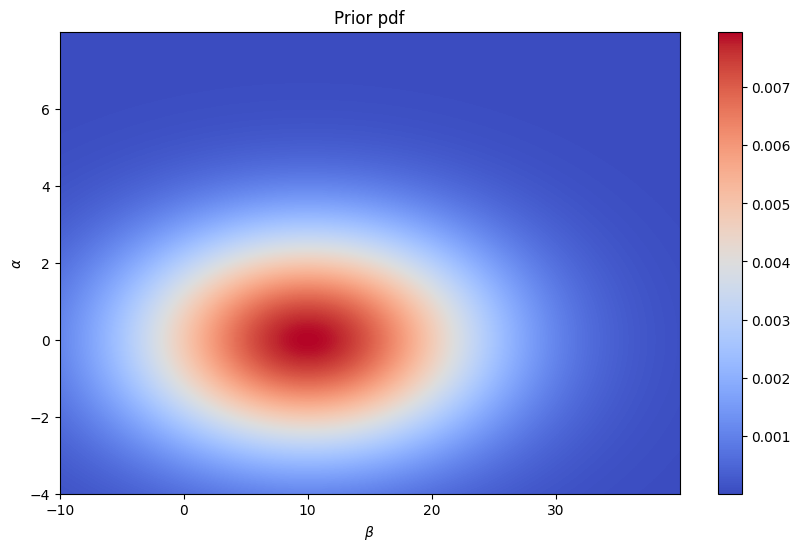

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
c = ax.pcolormesh(beta_vec, alpha_vec, prior_pdf_mat, cmap=cm.coolwarm, shading='auto')
fig.colorbar(c, ax=ax)
ax.set_title(f"Prior pdf")
ax.set_xlabel(r"$\beta$")
ax.set_ylabel(r"$\alpha$");

* Compute the maximum a posteriore estimate $\alpha^{\rm MAP}, \beta^{\rm MAP}$.

In [26]:
def maximize_posterior(alpha_vec, beta_vec, posterior_dist):
    # Find the indices of the maximum element in the posterior distribution
    i, j = np.unravel_index(posterior_dist.argmax(), posterior_dist.shape)
    
    # The MAP estimate for alpha is the value at the maximum index in the alpha_vec array
    alpha_MAP = alpha_vec[i]
    
    # The MAP estimate for beta is the value at the maximum index in the beta_vec array
    beta_MAP = beta_vec[j]
    
    return alpha_MAP, beta_MAP

In [27]:
# Compute the MAP estimates
post_dist = posterior_dist(alpha_vec, beta_vec)
alpha_MAP, beta_MAP = maximize_posterior(alpha_vec, beta_vec, post_dist)

print(f'Alpha MAP estimate: {alpha_MAP}')
print(f'Beta MAP estimate: {beta_MAP}')

Alpha MAP estimate: 0.739999999999899
Beta MAP estimate: 7.6599999999996236


* Visualize the MAP estimate together with the unnormalized posterior in 2D. Comment the results.

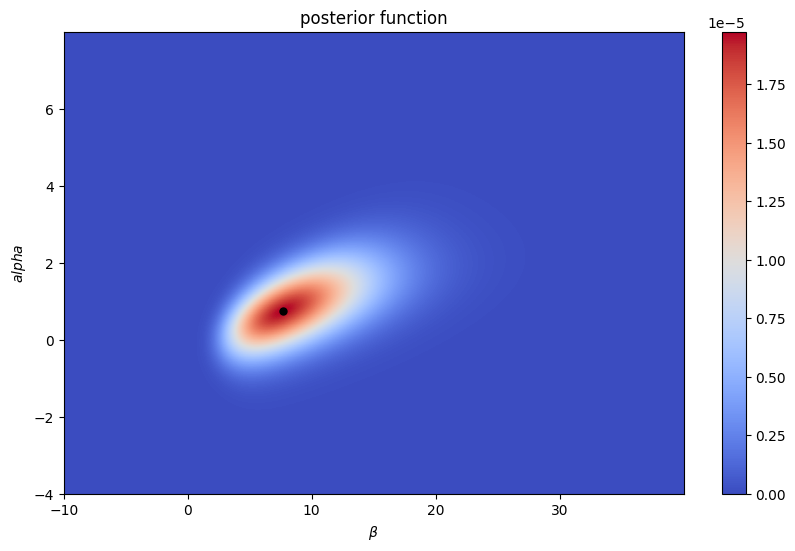

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))

c = ax.pcolormesh(beta_vec, alpha_vec, post_dist, cmap=cm.coolwarm, shading='auto')
fig.colorbar(c, ax=ax)
# Plot the MAP estimate as a red dot
ax.plot(beta_MAP, alpha_MAP, color='black', markersize=5, marker='o')
ax.set_title(f"posterior function")
ax.set_xlabel(r"$\beta$")
ax.set_ylabel(r"$alpha$");

## 1.3 Brute-force posterior estimation

* Compute a gridding approximation of the *normalized* posterior, with the correct normalization constant. Explain the passages.

In [29]:
# Compute the posterior distribution by multiplying the likelihood with the prior
# Prior, likelihood and posterior are all up to a scaling factor independent of theta


def unnorm_post_dist(alpha_vec, beta_vec, post_dist=[]):
    if len(post_dist) == 0:
        post_dist = posterior_dist(alpha_vec, beta_vec)
        
    post_dist_norm = post_dist / np.sum(post_dist)
    return post_dist_norm
   
    
# post_dist = posterior_dist(alpha_vec, beta_vec)

# Normalize the posterior so that it sums-up to 1
post_dist_norm = unnorm_post_dist(alpha_vec, beta_vec, post_dist)

* Using the grid-based approximation of the posterior, compute the posterior mean of $\alpha$ and $\beta$.

In [30]:
# Multiply each row in the matrix times the alpha and beta vectors and then sum up the results
alpha_post_mean = 0
beta_post_mean = 0

for row in post_dist_norm:
    beta_post_mean += beta_vec * row

    
for col_idx in range(post_dist_norm.shape[1]):
    alpha_post_mean += alpha_vec * post_dist_norm[:, col_idx]

    
alpha_post_mean = np.sum(alpha_post_mean)
beta_post_mean = np.sum(beta_post_mean)

In [31]:
print(f'Alpha posterior mean: {alpha_post_mean}')
print(f'Beta posterior mean: {beta_post_mean}')

Alpha posterior mean: 0.9502191250511216
Beta posterior mean: 9.98307039311747


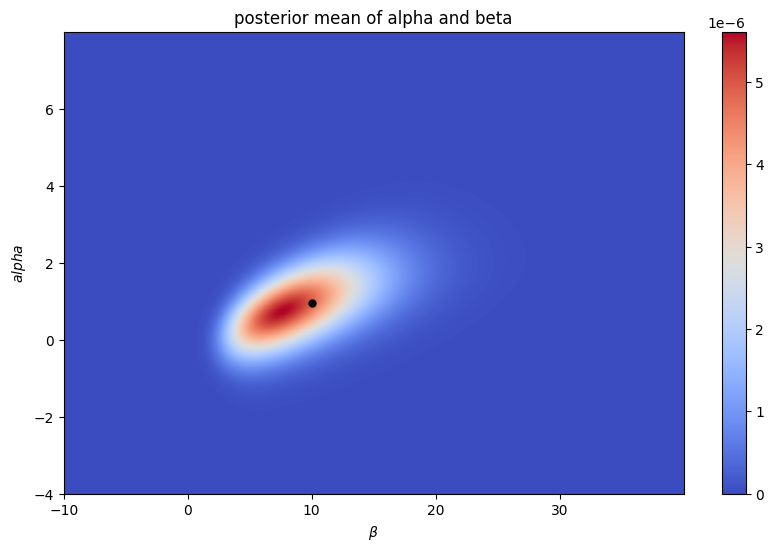

In [32]:
# Visualize the posterior mean alpha and beta
fig, ax = plt.subplots(figsize=(10, 6))
c = ax.pcolormesh(beta_vec, alpha_vec, post_dist_norm, cmap=cm.coolwarm, shading='auto')

fig.colorbar(c, ax=ax)
ax.set_title(f"posterior mean of alpha and beta")
ax.set_xlabel(r"$\beta$");
ax.set_ylabel(r"$alpha$");
ax.plot(beta_post_mean, alpha_post_mean, color='black', markersize=5, marker='o')

The mean is slighlty moved to highher values of alpha and beta if compared with the Ml estimate, as the likelihood is skewed towards the higher values.

## 1.4 Monte-carlo posterior estimation

* Obtain a sample-based approximation of the posterior $f(\theta | y)$ by implementing the Metropolis algorithm from scratch.

In [33]:
def p_ratio_fun(alpha_propose, beta_propose, alpha_previous, beta_previous):
    log_p_propose = log_posterior_dist(alpha_propose, beta_propose)
    log_p_previous = log_posterior_dist(alpha_previous, beta_previous)
    log_p_ratio = log_p_propose - log_p_previous 
    p_ratio = np.exp(log_p_ratio)
    return p_ratio

In [34]:
draws = 4_000 # number of Metropolis draws
tune = 1_000 # tuning samples to be discarded
alpha_0 = 0.5 # initial value for alpha
beta_0 = 10 # initial value for beta

sigma_prop_alpha = 2 # standard deviation of the proposal for alpha
sigma_prop_beta = 10 # standard deviation of the proposal for beta

N = draws + tune
alphas = []
betas = []
alpha_step = alpha_0
beta_step = beta_0
for idx in range(N):
    alphas.append(alpha_step)
    betas.append(beta_step)

    alpha_prop = alpha_step + sigma_prop_alpha * np.random.randn()
    beta_prop = beta_step + sigma_prop_beta * np.random.randn()
  
    p_ratio = p_ratio_fun(alpha_prop, beta_prop, alpha_step, beta_step)
    accept_prob = np.minimum(1.0, p_ratio)
    accept = (np.random.rand() < accept_prob)
    
    if accept:
        alpha_step = alpha_prop
        beta_step = beta_prop

alphas = np.array(alphas[tune:]) # discard initial samples (burn-in)
betas = np.array(betas[tune:])
thetas = np.c_[alphas, betas]

C:\Users\manue\AppData\Local\Temp\ipykernel_7924\1067702800.py:5: RuntimeWarning: divide by zero encountered in log
  liks = [(np.log(theta[i]) * y[i]) + (np.log(1 - theta[i])*(n[i]-y[i])) for i in range(4)]
C:\Users\manue\AppData\Local\Temp\ipykernel_7924\1067702800.py:5: RuntimeWarning: invalid value encountered in double_scalars
  liks = [(np.log(theta[i]) * y[i]) + (np.log(1 - theta[i])*(n[i]-y[i])) for i in range(4)]


In [35]:
np.mean(thetas, axis=0)

array([0.90679846, 9.41443423])

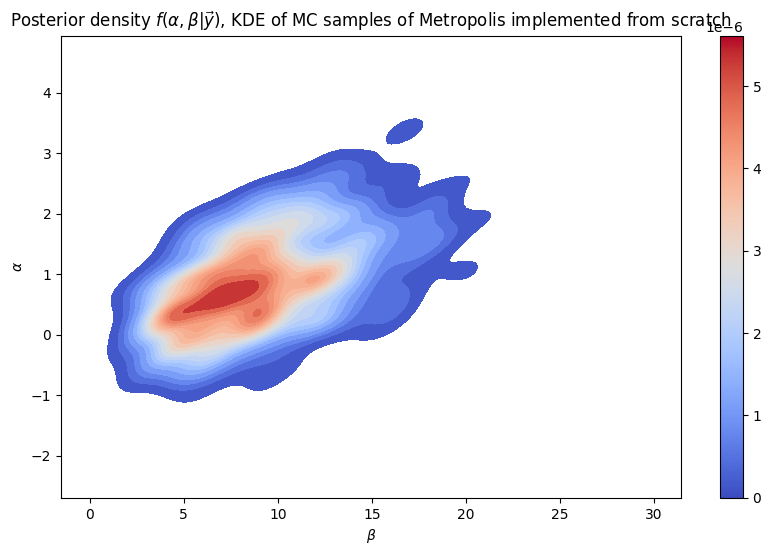

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.kdeplot(x=betas, y=alphas,
            fill=True, cmap=cm.coolwarm, levels=20)
fig.colorbar(c, ax=ax)
ax.set_xlabel(r"$\beta$")
ax.set_ylabel(r"$\alpha$")
plt.title(r"Posterior density $f(\alpha, \beta | \vec{y})$, KDE of MC samples of Metropolis implemented from scratch");

* Compare the Metropolis samples with the gridding-based approximation of the posterior distribution $f(\theta | y)$ and comment the result.

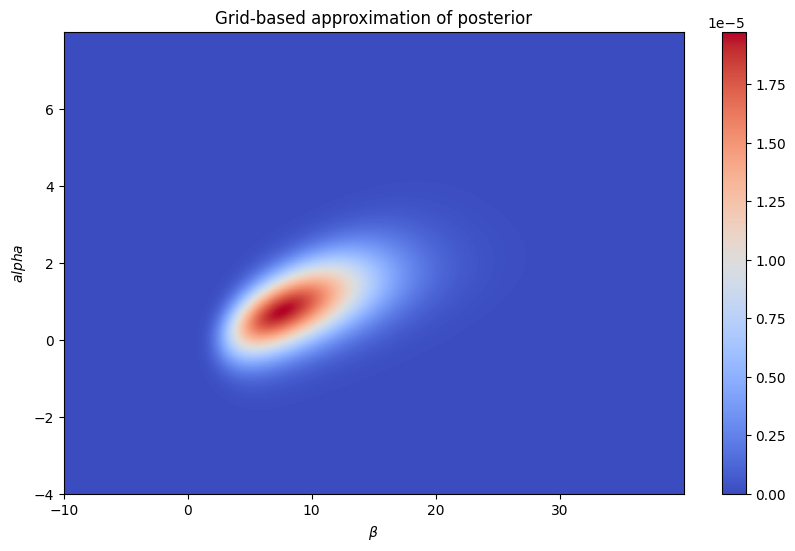

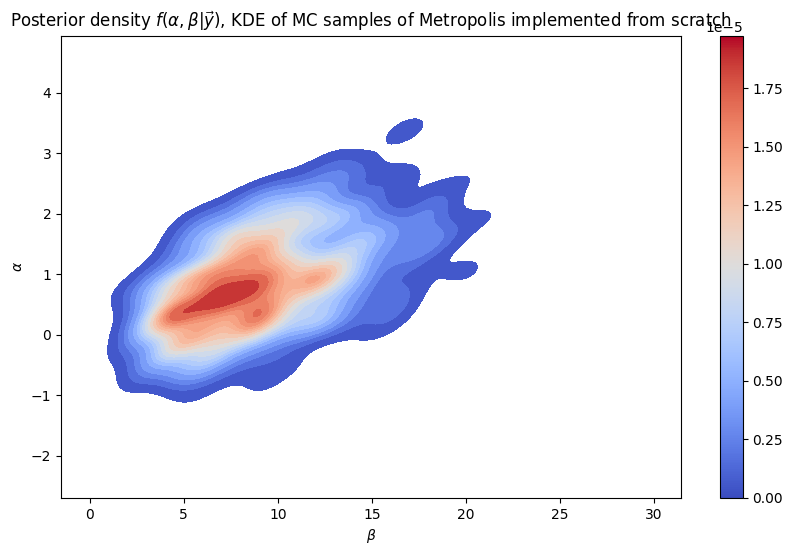

In [37]:
# Visualize the two approximations of the posterior

# Gridding
fig, ax = plt.subplots(figsize=(10, 6))
c = ax.pcolormesh(beta_vec, alpha_vec, post_dist, cmap=cm.coolwarm, shading='auto')
fig.colorbar(c, ax=ax)
ax.set_title(f"Grid-based approximation of posterior")
ax.set_xlabel(r"$\beta$")
ax.set_ylabel(r"$alpha$")

# Metropolis
fig, ax = plt.subplots(figsize=(10, 6))
sns.kdeplot(x=betas, y=alphas,
            fill=True, cmap=cm.coolwarm, levels=20)
fig.colorbar(c, ax=ax)
ax.set_xlabel(r"$\beta$")
ax.set_ylabel(r"$\alpha$")
plt.title(r"Posterior density $f(\alpha, \beta | \vec{y})$, KDE of MC samples of Metropolis implemented from scratch");

The results from the 2 posterior approximations are very similar. 
The means and ML estimate are almost the same for the two approximations.

* Obtain a sample-based approximation of the posterior $f(\theta | y)$ using pymc3.

In [38]:
with pm.Model() as bio_model:
    # Prior distribution
    alpha = pm.Normal('alpha', 0, sigma=2)
    beta = pm.Normal('beta', 10, sigma=10)
    
    theta = sigmoid(alpha + beta * x)
    
    # Linear combination of the parameters
    deaths = pm.Binomial('deaths', n=n, p=theta, observed=y)
    
    # Draw samples
    trace = pm.sample(1000, tune=2000, cores=2)

C:\Users\manue\AppData\Local\Programs\Python\Python310\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\manue\AppData\Local\Programs\Python\Python310\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\manue\AppData\Local\Programs\Python\Python310\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, alpha]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 22 seconds.


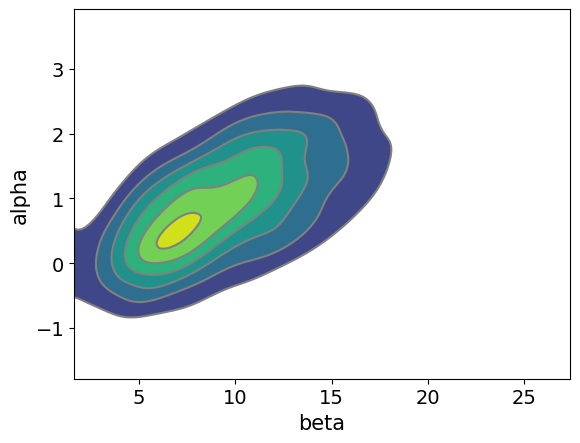

In [39]:
with bio_model:
    az.plot_pair(trace,
                 kind="kde",
                 var_names=['beta','alpha']);

* Comment the results obtained with pymc3 and compare them with previous results (gridding and Metropolis from scratch).

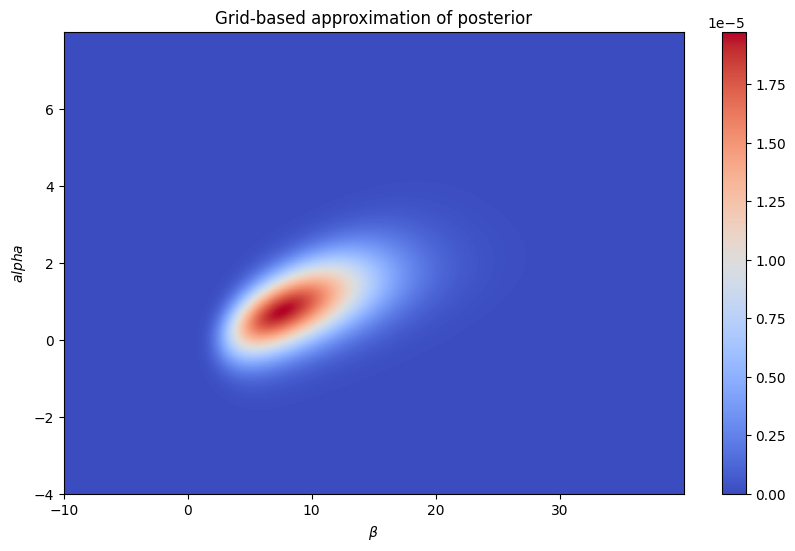

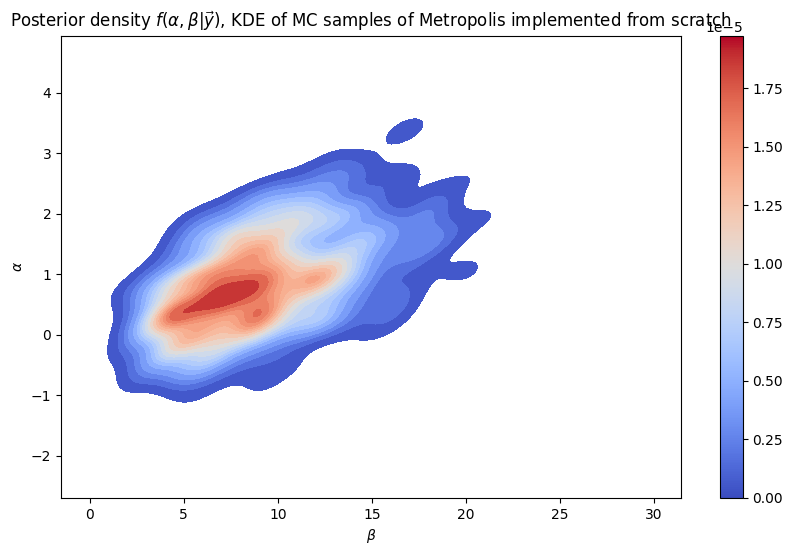

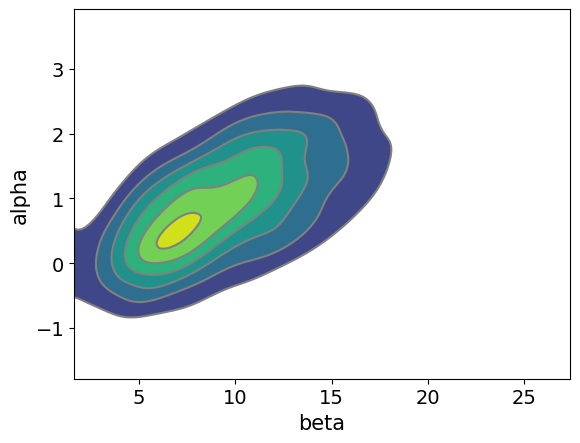

In [40]:
# Visualize the three approximations of the posterior

# Gridding
fig, ax = plt.subplots(figsize=(10, 6))
c = ax.pcolormesh(beta_vec, alpha_vec, post_dist, cmap=cm.coolwarm, shading='auto')
fig.colorbar(c, ax=ax)
ax.set_title(f"Grid-based approximation of posterior")
ax.set_xlabel(r"$\beta$")
ax.set_ylabel(r"$alpha$")

# Metropolis
fig, ax = plt.subplots(figsize=(10, 6))
sns.kdeplot(x=betas, y=alphas,
            fill=True, cmap=cm.coolwarm, levels=20)
fig.colorbar(c, ax=ax)
ax.set_xlabel(r"$\beta$")
ax.set_ylabel(r"$\alpha$")
plt.title(r"Posterior density $f(\alpha, \beta | \vec{y})$, KDE of MC samples of Metropolis implemented from scratch");

# pymc3
with bio_model:
    az.plot_pair(trace,
                 kind="kde",
                 var_names=['beta','alpha']);

The results from the 3 posterior approximations are all very similar. 
The means and ML estimate are for all the models pretty similar.

